# Bring in libraries and dataframes and set indexes

In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import GraphHelpers as GH

Data = pd.read_pickle('.\DataFrames\TempAndMet.pkl')
GH.SortFrame(Data)

#Select the Radiation Data
RadnData = Data.loc[:,Data.columns.isin(['AboveCanopyPAR','BelowCanopyPAR','IncomingRadnKW','IncomingRadnMJ','ReflectedRadnKW','ReflectedRadnMJ'],level=0)]

#Calculate reflectance and interception indices
Ref = RadnData.loc[:,'AboveCanopyPAR'].mean(axis=1).resample('d').sum()
tPAR = RadnData.loc[:,'BelowCanopyPAR'].resample('d').sum().divide(Ref,axis=0)
GH.SortFrame(tPAR)
FPAR = 1-tPAR
FPAR.index.name = 'Date'
FPAR.to_pickle('.\DataFrames\DailyFPARTot.pkl')
Ref = RadnData.loc[:,'IncomingRadnMJ'].mean(axis=1).resample('d').sum()
Albedo = RadnData.loc[:,'ReflectedRadnMJ'].resample('d').sum().divide(Ref, axis=0) 
Albedo.drop(labels=[('Excess','320','3'),('Normal','125','3')],axis=1,inplace=True)
GH.SortFrame(Albedo)

tPARhourly = RadnData.loc[:,'BelowCanopyPAR'].divide(RadnData.loc[:,'AboveCanopyPAR'].mean(axis=1),axis=0)
FPARhourly = 1 - tPARhourly
GH.SortFrame(FPARhourly)
AlbedoHourly = RadnData.loc[:,'ReflectedRadnMJ'].divide(RadnData.loc[:,'IncomingRadnMJ'].mean(axis=1),axis=0)
GH.SortFrame(AlbedoHourly)

In [2]:
GPs = GH.SetGraphicsPatterns(Data.BelowCanopyPAR.columns,
                    ['-','--'],
                    [0.15,0.45],
                    ['o','^'],
                    ['orange','green','purple'])

Start = Data.index.min()
End = Data.index.max()

Irrigation
['Excess', 'Normal']
Nitrogen
['125', '320', '80']
Treatments
MultiIndex(levels=[['Excess', 'Normal'], ['125', '320', '80']],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]])
Styles
[('-', 'orange', 0.15, 'o'), ('-', 'green', 0.15, 'o'), ('-', 'purple', 0.15, 'o'), ('--', 'orange', 0.45, '^'), ('--', 'green', 0.45, '^'), ('--', 'purple', 0.45, '^')]
StyleFrame
           Lin     Col   Alp Mar     MFC
Excess 125   -  orange  0.15   o  orange
       320   -   green  0.15   o   green
       80    -  purple  0.15   o  purple
Normal 125  --  orange  0.45   ^   white
       320  --   green  0.45   ^   white
       80   --  purple  0.45   ^   white


### Apply bias correction to Albedo data
The type of sensors used to measure reflected radiation (silicone pyranometer which is sensitive in the 360 - 1140 nm wavelength range) have a bias of about 20% over prediction of increase in albedo as crop FPARs increase.  To account for this a bias correction factor is applied to enable realistic estimations of albedo from crop FPAR measurements:
$Albedo_{cor} = Albedo * (1- FPAR*0.2)$

In [3]:
AlbedoCorrected = Albedo.copy()
for plot in AlbedoCorrected:
    CorrectionFactor = 1 - 0.2 * FPAR.loc[:,plot]
    AlbedoCorrected.loc[:,plot] = Albedo.loc[:,plot].multiply(CorrectionFactor)
GH.SortFrame(AlbedoCorrected)
AlbedoCorrected.to_pickle('.\DataFrames\DailyAlbedoCor.pkl')

AlbedoHourlyCorrected = AlbedoHourly
for plot in AlbedoHourlyCorrected:
    CorrectionFactor = 1 - 0.2 * FPARhourly.loc[:,plot]
    AlbedoHourlyCorrected.loc[:,plot] = AlbedoHourly.loc[:,plot].multiply(CorrectionFactor)

# Lets have a look at some of the data

In [4]:
FPAR

Irrigation    Excess                                                    \
Nitrogen         125                                     320             
Block              1         2         3         4         1         2   
Date                                                                     
2017-08-21  0.813190  0.531552  0.475872  0.762930  0.807622  0.802054   
2017-08-22       NaN       NaN       NaN       NaN       NaN       NaN   
2017-08-23       NaN       NaN       NaN       NaN       NaN       NaN   
2017-08-24       NaN       NaN       NaN       NaN       NaN       NaN   
2017-08-25       NaN       NaN       NaN       NaN       NaN       NaN   
2017-08-26       NaN       NaN       NaN       NaN       NaN       NaN   
2017-08-27       NaN       NaN       NaN       NaN       NaN       NaN   
2017-08-28       NaN       NaN       NaN       NaN       NaN       NaN   
2017-08-29       NaN       NaN       NaN       NaN       NaN       NaN   
2017-08-30       NaN       NaN       NaN       NaN       NaN       NaN   
2017-08-31       NaN       NaN       NaN       NaN       NaN       NaN   
2017-09-01       NaN       NaN       NaN       NaN       NaN       NaN   
2017-09-02       NaN       NaN       NaN       NaN       NaN       NaN   
2017-09-03       NaN       NaN       NaN       NaN       NaN       NaN   
2017-09-04       NaN       NaN       NaN       NaN       NaN       NaN   
2017-09-05       NaN       NaN       NaN       NaN       NaN       NaN   
2017-09-06  0.717315  0.470314  0.660314  0.721388  0.778952  0.737704   
2017-09-07  0.582389  0.435517  0.561408  0.498195  0.513032  0.547354   
2017-09-08  0.585918  0.478684  0.557327  0.522084  0.565651  0.539032   
2017-09-09  0.664025  0.492565  0.603018  0.544233  0.599968  0.630017   
2017-09-10  0.644668  0.554436  0.621588  0.559151  0.586463  0.583527   
2017-09-11  0.644935  0.575313  0.642036  0.589262  0.588646  0.577838   
2017-09-12  0.625962  0.547292  0.611783  0.590014  0.596687  0.553015   
2017-09-13  0.719067  0.616234  0.696784  0.666150  0.649978  0.663614   
2017-09-14  0.744527  0.622498  0.710756  0.652989  0.672995  0.690396   
2017-09-15  0.768877  0.632707  0.732118  0.688518  0.747389  0.744062   
2017-09-16  0.786893  0.628056  0.778470  0.727258  0.796027  0.800693   
2017-09-17  0.775410  0.675682  0.764276  0.737662  0.776214  0.726319   
2017-09-18  0.761917  0.665799  0.736873  0.763342  0.812198  0.702216   
2017-09-19  0.786020  0.682059  0.777360  0.783234  0.816218  0.752100   
...              ...       ...       ...       ...       ...       ...   
2017-12-06  0.944419  0.914984  0.970936  0.952585  0.993544  0.993335   
2017-12-07  0.941908  0.912004  0.969458  0.955248  0.995104  0.993278   
2017-12-08  0.946341  0.923135  0.971633  0.951539  0.993395  0.992211   
2017-12-09  0.941376  0.919524  0.964054  0.950344  0.993455  0.991909   
2017-12-10  0.944213  0.924535  0.966455  0.940781  0.992970  0.990379   
2017-12-11  0.927070  0.899161  0.961909  0.935283  0.989712  0.989093   
2017-12-12  0.958001  0.932264  0.961925  0.964979  1.000000  0.996947   
2017-12-13  0.964249  0.941105  0.969783  0.967047  0.999762  0.996847   
2017-12-14  0.938053  0.909030  0.966643  0.947846  0.994945  0.990446   
2017-12-15  0.901973  0.874759  0.942621  0.920919  0.987238  0.978141   
2017-12-16  0.916678  0.892915  0.948627  0.928236  0.986342  0.980115   
2017-12-17  0.903843  0.883343  0.942032  0.921900  0.983397  0.978285   
2017-12-18  0.935275  0.912471  0.948546  0.945815  0.995121  0.980128   
2017-12-19  0.916567  0.896416  0.932867  0.934233  0.993622  0.978435   
2017-12-20  0.913167  0.884593  0.913951  0.927780  0.982672  0.972437   
2017-12-21  0.930059  0.910577  0.899546  0.935372  0.993385  0.975492   
2017-12-22  0.922272  0.888831  0.918823  0.940512  0.987479  0.981271   
2017-12-23  0.903756  0.874451  0.903785  0.914261  0.982886  0.967834   
2017-12-24  0.929618  0.898333  0.902335  0.929289  0.985833  0.973325   
2017

In [13]:
labels

odict_values([<matplotlib.lines.Line2D object at 0x00000266B6AB9CF8>, <matplotlib.lines.Line2D object at 0x00000266B6AC3DA0>, <matplotlib.lines.Line2D object at 0x00000266B6ACDDD8>, <matplotlib.lines.Line2D object at 0x00000266B6AD4DA0>, <matplotlib.lines.Line2D object at 0x00000266B6ADFDD8>, <matplotlib.lines.Line2D object at 0x00000266B6AE6E10>])

In [14]:
handles

odict_keys(['Excess 125', 'Excess 320', 'Excess 80', 'Normal 125', 'Normal 320', 'Normal 80'])

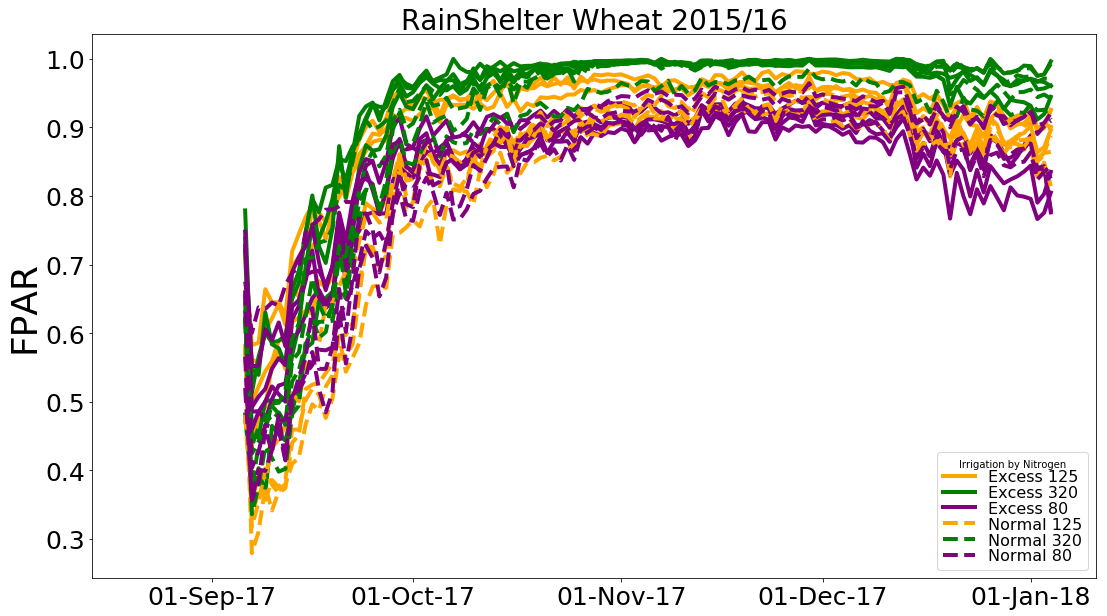

In [11]:
Graph = plt.figure(figsize=(18,10))
ax = Graph.add_subplot(1,1,1)
GH.AddIndexedPlot(FPAR,ax,GPs,4)
plt.ylabel('FPAR', fontsize=36);
plt.tick_params(labelsize=25)
plt.title('RainShelter Wheat 2015/16', fontsize=28);
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
labels, handles = GH.DedupLegendElements()
ledg = plt.legend(labels, handles,loc=4,numpoints=1,fontsize = 16,labelspacing = 0.05, 
                          title='Irrigation by Nitrogen')

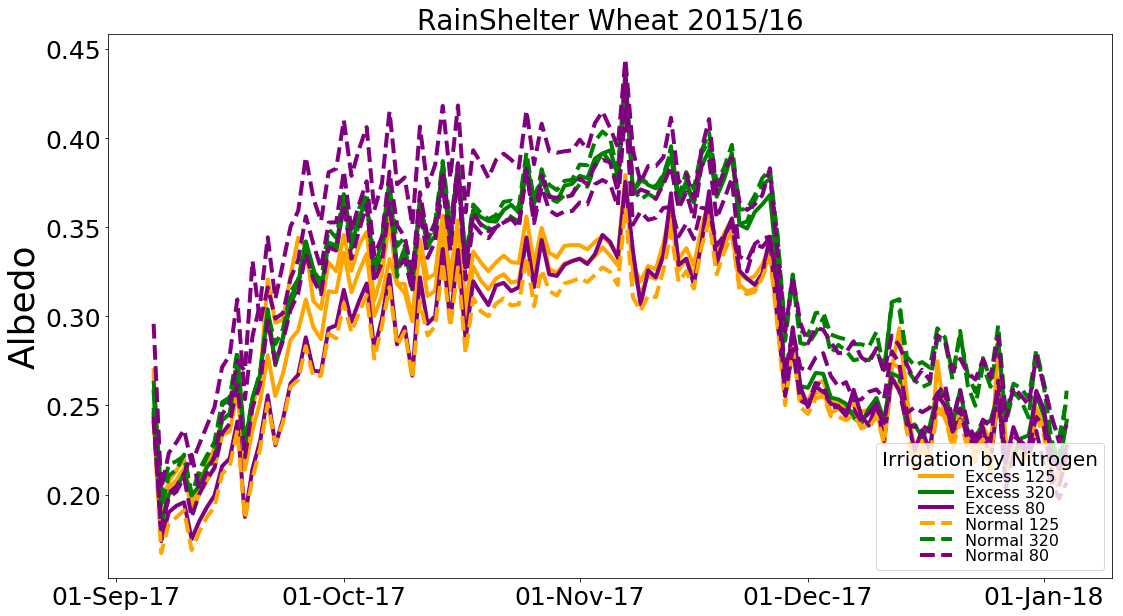

In [6]:
Graph = plt.figure(figsize=(18,10))
ax = Graph.add_subplot(1,1,1)
GH.AddIndexedPlot(Albedo,ax,GPs,4)
plt.ylabel('Albedo', fontsize=36);
plt.tick_params(labelsize=25)
plt.title('RainShelter Wheat 2015/16', fontsize=28);
plt.legend(fontsize=24, loc=3)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
labels, handles = GH.DedupLegendElements()
ledg = plt.legend(labels, handles,loc=4,numpoints=1,fontsize = 16,labelspacing = 0.05, 
                          title='Irrigation by Nitrogen')
ledg.get_title().set_fontsize(20)

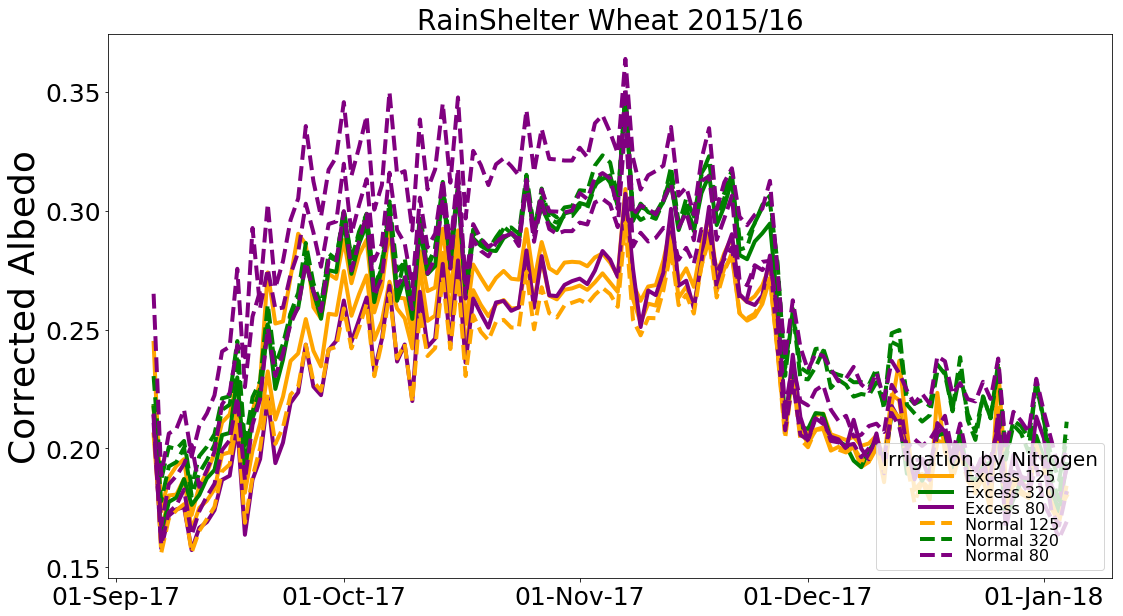

In [7]:
Graph = plt.figure(figsize=(18,10))
ax = Graph.add_subplot(1,1,1)
GH.AddIndexedPlot(AlbedoCorrected,ax,GPs,4)
plt.ylabel('Corrected Albedo', fontsize=36);
plt.tick_params(labelsize=25)
plt.title('RainShelter Wheat 2015/16', fontsize=28);
plt.legend(fontsize=24, loc=3)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
labels, handles = GH.DedupLegendElements()
ledg = plt.legend(labels, handles,loc=4,numpoints=1,fontsize = 16,labelspacing = 0.05, 
                          title='Irrigation by Nitrogen')
ledg.get_title().set_fontsize(20)

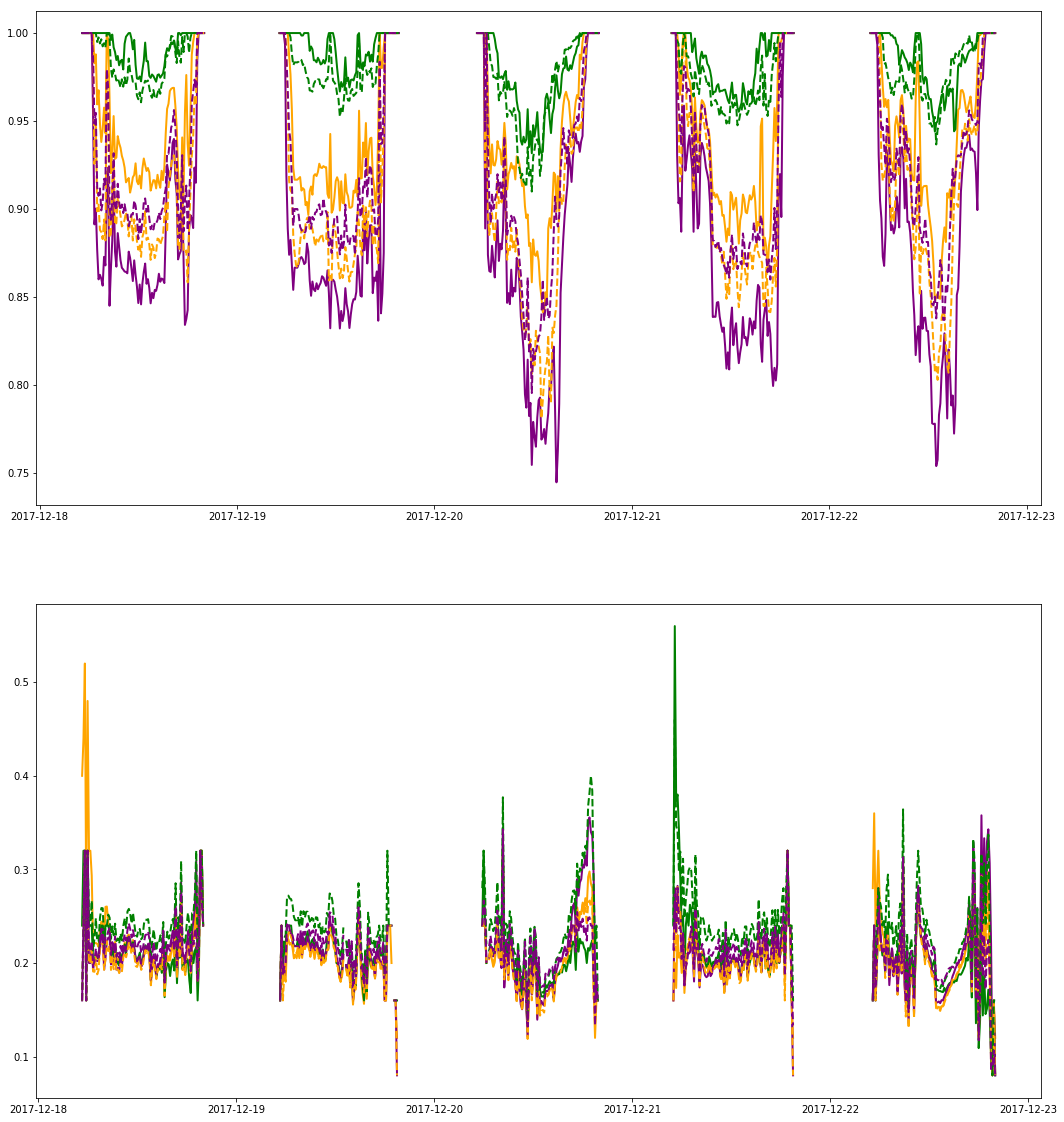

In [8]:
Start = '2017-12-18'
End = '2017-12-22'
Graph = plt.figure(figsize=(18,20))
ax = Graph.add_subplot(2,1,1)
#Calculate treatment means
FPARHourlyMeans = FPARhourly.groupby(level=['Irrigation','Nitrogen'],axis=1).mean()
Sample  = FPARHourlyMeans.loc[Start:End,:]
GH.AddIndexedPlot(Sample,ax,GPs,2)

ax = Graph.add_subplot(2,1,2)
AlbedoHourlyCorrectedMeans = AlbedoHourlyCorrected.groupby(level=['Irrigation','Nitrogen'],axis=1).mean()
Sample  = AlbedoHourlyCorrectedMeans.loc[Start:End,:]
GH.AddIndexedPlot(Sample,ax,GPs,2)


# Look at the relationship between albido and radiation interception

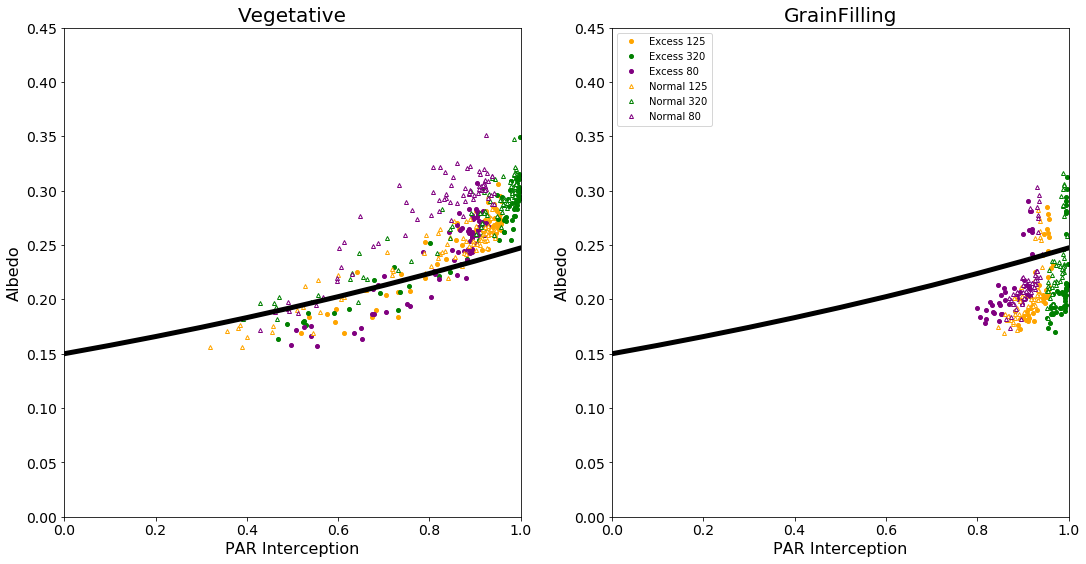

In [9]:
FunctX = np.float64(range(0,11,1))/10
FunctY = []
FunctYBiasCor = []
for x in FunctX:
    value = .15 * np.exp(x*.5)
    FunctY.append(value)
Turn = '2017-11-20'
Start = '2017-09-01'
End = '2018-01-10'
DailyAlbedoMeans = AlbedoCorrected.loc[Start:Turn,:].groupby(
    level=['Irrigation','Nitrogen'],axis=1).mean()
DailyFPARMeans = FPAR.loc[Start:Turn,:].groupby(
    level=['Irrigation','Nitrogen'],axis=1).mean()

Graph = plt.figure(figsize = (18,9))
ax = Graph.add_subplot(1,2,1)
GH.AddIndexedXY(DailyFPARMeans,DailyAlbedoMeans,ax,GPs,4)

plt.plot(FunctX,FunctY,'-',color = 'k',linewidth=5)
plt.ylim(0,0.45)
plt.xlim(0,1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Vegetative',fontsize=20)
plt.ylabel('Albedo',fontsize=16)
plt.xlabel('PAR Interception',fontsize=16)

DailyAlbedoMeans = AlbedoCorrected.loc[Turn:End,:].groupby(
    level=['Irrigation','Nitrogen'],axis=1).mean()
DailyFPARMeans = FPAR.loc[Turn:End,:].groupby(
    level=['Irrigation','Nitrogen'],axis=1).mean()

ax = Graph.add_subplot(1,2,2)
GH.AddIndexedXY(DailyFPARMeans,DailyAlbedoMeans,ax,GPs,4)

plt.plot(FunctX,FunctY,'-',color ='k',linewidth=5)
plt.ylim(0,0.45)
plt.xlim(0,1)
plt.title('GrainFilling',fontsize=20)
plt.ylabel('Albedo',fontsize=16)
plt.xlabel('PAR Interception',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc = 2)

### The effects of FPAR on albedo can be described using an exponential function 
$Albedo = 0.15 * e^{(FPAR*0.5)}$
Where 0.15 represents the bare soil albedo and $e^{(FPAR*0.5)}$ is the effect of crop FPAR. These coeffocients are taken from barley and better fits may be needed for wheat

## Calculate estimated Albedo for all plots from FPAR data

## Bring in NDVI data and convert to FPAR estimate

In [10]:
NDVI = pd.read_excel('.\RawDatafiles\OatsCanopy.xlsx',sheet_name='PlotNDVI',
                     index_col=[0],header=[0,1,2])
NDVIDF = pd.concat([NDVI],axis=1,keys=['NDVI'],names=['Measurement'])
GH.SortFrame(NDVIDF)

FileNotFoundError: [Errno 2] No such file or directory: '.\\RawDatafiles\\OatsCanopy.xlsx'

In [ ]:
Graph = plt.figure(figsize=(18,9))
ax = Graph.add_subplot(1,1,1)
GH.AddIndexedPlot(NDVIDF.NDVI,ax,GPs,3)

### Extrapolate fPAR estimated from NDVI out to daily values using temperature accumulation

In [ ]:
TempAccum = Data.AirTemperature.resample('d').mean().cumsum()
DailyDates= TempAccum.index
DailyfPAREstInterp = pd.DataFrame(index = TempAccum.index, columns = NDVI.columns)
for plot in DailyfPAREstInterp.columns:
    DailyfPAREstInterp.loc[:,plot] = np.interp(TempAccum, 
                                               TempAccum.reindex(NDVI.index).loc[:,('Expt','Expt','Expt')].values,
                                               NDVI.loc[:,plot].values)

In [ ]:
Graph = plt.figure(figsize=(18,9))
ax = Graph.add_subplot(1,1,1)
GH.AddIndexedPlot(DailyfPAREstInterp,ax,GPs,3)

In [ ]:
DailyfPAREstInterp.to_pickle('.\DataFrames\DailyfPAREstInt.pkl')

## Calculate estimated Albedo for all plots from FPAR data

In [ ]:
def EstAlbedo(FPAR,coeff,intercept):
    _return = np.multiply(FPAR,coeff)
    _return = np.exp(_return)
    _return = np.multiply(_return,intercept)
    return _return

In [ ]:
AlbedoCorEstInt = FPAR.copy()
AlbedoCorEstInt = pd.concat([AlbedoCorEstInt],axis=1,keys=['AlbedoCorEstInt'],names=['Measurement'])
for plot in AlbedoCorEstInt.AlbedoCorEstInt:
    AlbedoCorEstInt.AlbedoCorEstInt.loc[:,plot] = EstAlbedo(FPAR.loc[:,plot],0.5,0.15)

In [ ]:
Graph = plt.figure(figsize=(18,20))
ax = Graph.add_subplot(2,1,1)
GH.AddIndexedPlot(AlbedoCorEstInt.AlbedoCorEstInt,ax,GPs,2)

In [ ]:
AlbedoCorEstInt.AlbedoCorEstInt.to_pickle('.\DataFrames\DailyAlbedoCorEstInt.pkl')

## Bring in the Sunscan data

In [ ]:
Cover = pd.read_excel('.\RawDatafiles\OatsCanopy.xlsx',sheet_name='SunScanCover',
                     index_col=[0],header=[0,1,2])
SSFPARDF = pd.concat([Cover],axis=1,keys=['SunScanCover'],names=['Measurement'])
GH.SortFrame(SSFPARDF)

In [ ]:
Graph = plt.figure(figsize=(18,9))
ax = Graph.add_subplot(1,1,1)
GH.AddIndexedPlot(SSFPARDF.SunScanCover,ax,GPs,3)

In [ ]:
LAI = pd.read_excel('.\RawDatafiles\Canopy.xlsx',sheet_name='SunScanLAI',
                     index_col=[0],header=[0,1,2])
SSLAIDF = pd.concat([LAI],axis=1,keys=['SunScanLAI'],names=['Measurement'])
GH.SortFrame(SSLAIDF)

In [ ]:
Graph = plt.figure(figsize=(18,9))
ax = Graph.add_subplot(1,1,1)
GH.AddIndexedPlotWithSEM(SSLAIDF.SunScanLAI,ax,GPs,3)

## The data on 2015-12-11 is bad because it was a very windy day and the canopy was being held 'flatter' by the wind.  Removed observations from this date

In [ ]:
SSFPARDF.drop(index=pd.to_datetime('2015-12-11'),inplace=True)
SSLAIDF.drop(index=pd.to_datetime('2015-12-11'),inplace=True)

In [ ]:
RadInt = SSFPARDF.unstack()

## Bring in data for destructive LAI measurements

In [ ]:
DesLAI = pd.read_excel('.\RawDatafiles\Canopy.xlsx',sheet_name='DestructiveLAI',
                     index_col=[0],header=[0,1,2])
LAIDF = pd.concat([DesLAI],axis=1,keys=['LAI'],names=['Measurement'])
GH.SortFrame(LAIDF)

In [ ]:
Graph = plt.figure(figsize=(18,9))
ax = Graph.add_subplot(1,1,1)
GH.AddIndexedPlotWithSEM(LAIDF.LAI,ax,GPs,3)

In [ ]:
MeanTemp = Data[('AirTemperature','Expt','Expt','Expt')].resample('D').mean().to_frame()
MeanTemp.AirTemperature.where(MeanTemp.AirTemperature>-10,10,inplace=True) #Replace junk data at start with estimates
MeanTemp[('AcummTT','Expt','Expt','Expt')]= MeanTemp['AirTemperature'].cumsum()
MeanTemp.columns.names = Data.columns.names

## Stick all the data into one data frame

In [ ]:
#Give the FPAR dataframe a measurement lable
FPAR = FPAR.transpose()
FPAR['Measurement'] = 'FPAR'
FPAR = FPAR.set_index('Measurement',append=True)
FPAR = FPAR.reorder_levels(['Measurement','Irrigation','Nitrogen','Block'])
FPAR = FPAR.transpose()
FPAR.index = pd.to_datetime(FPAR.index)

#Give the AlbedoCorrected dataframe a measurement lable
AlbedoCorrected = AlbedoCorrected.transpose()
AlbedoCorrected['Measurement'] = 'AlbedoCorrected'
AlbedoCorrected = AlbedoCorrected.set_index('Measurement',append=True)
AlbedoCorrected = AlbedoCorrected.reorder_levels(['Measurement','Irrigation','Nitrogen','Block'])
AlbedoCorrected = AlbedoCorrected.transpose()
AlbedoCorrected.index = pd.to_datetime(AlbedoCorrected.index)

DailyData = FPAR.join(AlbedoCorrected)
DailyData = DailyData.join(LAIDF)
DailyData = DailyData.join(NDVIDF)
DailyData = DailyData.join(SSFPARDF)
DailyData = DailyData.join(SSLAIDF)
DailyData = DailyData.join(MeanTemp)
DailyData.index = pd.DatetimeIndex(DailyData.index).normalize()

GH.SortFrame(DailyData)

In [ ]:
MatchObsDates=LAIDF.index

## First lets look at how well the sun-scan estimated LAI and correct its LAI estimates.  There were three dates when LAI was measured destructively and measured with the sun scan at the same time

In [ ]:
Graph = plt.figure(figsize=(18,9))
ax = Graph.add_subplot(1,1,1)
GH.AddIndexedXY(LAIDF.LAI,SSLAIDF.reindex(MatchObsDates).SunScanLAI,ax,GPs,12)
plt.ylabel('SunScan', fontsize=36);
plt.xlabel('LAI', fontsize=36)
plt.tick_params(labelsize=25)
plt.title('RainShelter Wheat 2015/16', fontsize=28);
labels, handles = GH.DedupLegendElements()
ledg = plt.legend(labels, handles,loc=4,numpoints=1,fontsize = 16,labelspacing = 0.05, 
                          title='Irrigation by Nitrogen')
ledg.get_title().set_fontsize(20)
plt.plot([0,4.5],[0,4.5],'-k')

### Relationship is not particularly good for some reason.  We don't really use the LAI data for much so leave as is.  Refer to barley script if calibration of sunscan LAI is needed in future


In [ ]:
for plot in DailyData.loc[:,'SunScanLAI'].columns:
    DailyData.loc[:,('SunScanLAICorrected',plot[0],plot[1],plot[2])] = np.divide(DailyData.loc[:,('SunScanLAI',plot[0],plot[1],plot[2])].values,1.0)

## Interpolate LAI to daily values using accum TT

In [ ]:
Dates = DailyData.loc[:,'SunScanLAICorrected'].dropna().index
for plot in DailyData.loc[:,'SunScanLAICorrected'].columns:
    xarray = DailyData.loc[Dates,('AcummTT','Expt','Expt','Expt')].values
    yarray = DailyData.loc[Dates,('SunScanLAICorrected',plot[0],plot[1],plot[2])].values
    DailyData.loc[:,('SunScanLAICorrected',plot[0],plot[1],plot[2])] = np.interp(DailyData.loc[:,('AcummTT','Expt','Expt','Expt')],xarray,yarray)

In [ ]:
Graph = plt.figure(figsize=(18,9))
ax = Graph.add_subplot(1,1,1)
GH.AddIndexedPlotWithSEM(DailyData.loc[:,'SunScanLAICorrected'],ax,GPs,3)

In [ ]:
DailyData.loc[:,('SunScanLAICorrected')].to_pickle('.\DataFrames\DailyLAICorInt.pkl')

## Have a look at FPAR vs LAI

In [ ]:
Graph = plt.figure(figsize=(18,9))
ax = Graph.add_subplot(1,1,1)
GH.AddIndexedXY(DailyData.reindex(MatchObsDates).SunScanLAI,
                DailyData.reindex(MatchObsDates).FPAR,ax,GPs,12)
plt.ylabel('SunScan', fontsize=36);
plt.xlabel('LAI', fontsize=36)
plt.tick_params(labelsize=25)
plt.title('RainShelter Wheat 2015/16', fontsize=28);
labels, handles = GH.DedupLegendElements()
ledg = plt.legend(labels, handles,loc=4,numpoints=1,fontsize = 16,labelspacing = 0.05, 
                          title='Irrigation by Nitrogen')
ledg.get_title().set_fontsize(20)
#plt.plot([0,4.5],[0,4.5],'-k') 
xfit = np.float64(range(20))/2
yfit = []
for xf in xfit:
    yf = 1 - np.exp(-.8*xf)
    yfit.append(yf)
plt.plot(xfit,yfit,'-k')

## Now have a look at FPAR from NDVI and SunScan vs continious PAR Int measurements.  Limit this analysis to the period from sowing to peak canopy when the bulk of the leaf area is still green.  As a result the relationship produced is for estimating FPAR of green leaf (FPARGreen) and will not provide estimate of the FPAR intercepted by dead leaf

In [ ]:
Graph = plt.figure(figsize=(18,9))
ax = Graph.add_subplot(1,1,1)
GH.AddIndexedPlotWithSEM(DailyData.FPAR,ax,GPs,3)

In [ ]:
Cols = pd.MultiIndex.from_product([['Dryland','Irrigated'],['0','50','250']],names=['Irrigation','Nitrogen'])
Coeffs = pd.DataFrame(index=['A','B','C'],columns=Cols,)
Coeffs.loc[:,('Dryland','0')]   = [0.85,0.35,0.50]
Coeffs.loc[:,('Dryland','50')]   = [0.85,0.35,0.50]
Coeffs.loc[:,('Dryland','250')]  = [0.85,0.35,0.50]
Coeffs.loc[:,('Irrigated','0')]  = [0.85,0.35,0.60]
Coeffs.loc[:,('Irrigated','50')]  = [0.85,0.35,0.50]
Coeffs.loc[:,('Irrigated','250')] = [0.85,0.35,0.40]
Coeffs

In [ ]:
Graph = plt.figure(figsize=(18,9))
ax = Graph.add_subplot(1,1,1)
GH.AddIndexedXY(DailyData.loc[:Turn,'FPAR'],
                DailyData.loc[:Turn,'NDVI'],ax,GPs,12)
plt.xlabel('FPAR (daily integral)', fontsize=20)
plt.ylabel('NDVI - BareSoilNDVI', fontsize=20)
plt.tick_params(labelsize=25)
plt.title('RainShelter Wheat 2015/16', fontsize=28);
labels, handles = GH.DedupLegendElements()
ledg = plt.legend(labels, handles,loc=4,numpoints=1,fontsize = 16,labelspacing = 0.05, 
                          title='Irrigation by Nitrogen')
ledg.get_title().set_fontsize(20)
plt.plot([0,1],[0,1],'-k')

for irr in GPs.F1Levels:
    for nit in GPs.F2Levels:
        xfit = np.float64(range(20))/10
        yfit = []
        A = Coeffs.loc['A',(irr,nit)]
        B = Coeffs.loc['B',(irr,nit)]
        C = Coeffs.loc['C',(irr,nit)]
        for xf in xfit:
            #
            yf = A * 1 / (1 + np.exp(-(xf -C) /B));
            y0 = A * 1 / (1 + np.exp(-(0 - C) /B));
            ydiffProp = (y0/(A + y0)) * 2
            yf = (yf-y0)/(1-ydiffProp)
            yfit.append(yf)
        plt.plot(xfit,yfit,GPs.StyleFrame.loc[(irr,nit),'Lin'],color=GPs.StyleFrame.loc[(irr,nit),'Col'],linewidth=3)
plt.ylim(0,1)
plt.xlim(0,1.1)

In [ ]:
end = '2014-12-31'
Cultivars =['Dash','Omaka']
Irrigations = ['Low','High']
Graph = plt.figure(figsize = (18,10))
cultColors = ['w','w','r','b']
irrigColors = ['r','b','r','b']
A = [0.65,0.66,0.65,0.65]
B = [.16,.17,.2,.15]
C = [.45,.48,.5,.4]
linestyles = ['--','--','-','-']
pos = 0
#cultpos = 0
for Cult in Cultivars:
    for Irr in Irrigations:
        #remove bare soil values from NDVI
        NDVI = np.subtract(DailyData.loc['2014-11-07':end,('NDVI',Cult,Irr)].dropna(),
                           BareSoilNDVI.loc['2014-11-07':end,'Low'])
        PAR = DailyData.loc[NDVI.index,('FPAR',Cult,Irr)]        
        plt.plot(PAR,NDVI.loc[:,PAR.columns],'o',mec = irrigColors[pos],mfc=cultColors[pos],markersize=15)
        xfit = np.float64(range(20))/10
        yfit = []
        for xf in xfit:
            #
            yf = Coeffs.loc['A',(Cult,Irr)] * 1 / (1 + np.exp(-(xf -Coeffs.loc['C',(Cult,Irr)]) / Coeffs.loc['B',(Cult,Irr)]));
            y0 = Coeffs.loc['A',(Cult,Irr)] * 1 / (1 + np.exp(-(0 - Coeffs.loc['C',(Cult,Irr)]) / Coeffs.loc['B',(Cult,Irr)]));
            ydiffProp = (y0/(Coeffs.loc['A',(Cult,Irr)] + y0)) * 2
            yf = (yf-y0)/(1-ydiffProp)
            yfit.append(yf)
            #print(str(xf)+" "+str(yf)+" "+str(y0)+" "+str(ydiffProp))
        plt.plot(xfit,yfit,linestyles[pos],color=irrigColors[pos],linewidth=3)
        pos += 1
        #cultpos+=1
plt.ylim(0,1)
plt.xlim(0,1.1)
plt.xlabel('FPAR (daily integral)', fontsize=20)
plt.ylabel('NDVI - BareSoilNDVI', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)


The function fitted to data is a standard sigmoid:  
$ y = A * 1/(1+e^{-(x-C)/B})$  
that has been rescaled to pass through the origin:  
$ y = (A * 1/(1+e^{-(x-C)/B}) - y0)/(1-yDiffprop)$  
where $y0$ is the value of $y$ from the unscaled sigmoid where $x = 0$:  
$ y0 =  A * 1/(1+e^{-(0-C)/B})$
and $yDiffprop$ is the proportion of $A$ that is not FPARed by the unscaled function and is given by:   
$yDiffprop = y0/(A+y0)$

###To correct NDVI Data to be equivelent to logged PAR interception
Rearanging the scaled sigmoid to solve for x  
$y = (A * 1/(1+np.exp(-(x-C)/B))-y0)/(1-yDiffprop)$
$y*(1-yDiffprop) = A * 1/(1+np.exp(-(x-C)/B))-y0$
$(y*(1-yDiffprop))+y0 = A * 1/(1+np.exp(-(x-C)/B))$  
$((y*(1-yDiffprop))+y0)/A = 1/(1+np.exp(-(x-C)/B))$  
$1/(((y*(1-yDiffprop))+y0)/A) = 1+np.exp(-(x-C)/B)$  
$1/(((y*(1-yDiffprop))+y0)/A)-1 = np.exp(-(x-C)/B)$  
$np.log(1/(((y*(1-yDiffprop))+y0)/A)-1) = -(x-C)/B$  
$np.log(1/(((y*(1-yDiffprop))+y0)/A)-1)*B = -(x-C)$  
$-(np.log(1/(((y*(1-yDiffprop))+y0)/A)-1)*B) = x-C$  
$-(np.log(1/(((y*(1-yDiffprop))+y0)/A)-1)*B)+C = x$  
  
$NDVIFPAR = -(np.log(1/(((y*(1-yDiffprop))+y0)/A)-1)*B)+C$

# NDVI to FPARgreen estimate in a function

In [ ]:
def NVDItoFPARGreen(A,B,C,NDVI):
    y0 = A * 1 / (1 + np.exp(-(0 - C) / B));
    #print(y0)
    yDiffprop = (y0/(A + y0))*2
    #print(yDiffprop)
    FPARestimated = -(np.log(1/(((NDVI*(1-yDiffprop))+y0)/A)-1)*B)+C
    #print(FPARestimated)
    if np.isnan(FPARestimated):
        FPARestimated = 1
    if FPARestimated > 1:
        FPARestimated = 1
    if NDVI <= 0:
        FPARestimated = 0
    return FPARestimated

## Function to hold FPAR at maximum value as NDVI declines

In [ ]:
def FPARGreenToFPAR(FPARGreen):
    maxGreen = 0
    pos = 0
    for row in FPARGreen:
        if row < maxGreen:
            FPARGreen[pos] = maxGreen
        if row > maxGreen:
            maxGreen = FPARGreen[pos]
        pos+=1
    return FPARGreen

In [ ]:
FPAREst_Columns = [('FPAREst','Dash','Low','1'),
('FPAREst','Dash','Low','2'),
('FPAREst','Dash','Low','3'),
('FPAREst','Dash','Low','4'),
('FPAREst','Dash','Mid','1'),
('FPAREst','Dash','Mid','2'),
('FPAREst','Dash','Mid','3'),
('FPAREst','Dash','Mid','4'),
('FPAREst','Dash','High','1'),
('FPAREst','Dash','High','2'),
('FPAREst','Dash','High','3'),
('FPAREst','Dash','High','4'),
('FPAREst','Omaka','Low','1'),
('FPAREst','Omaka','Low','2'),
('FPAREst','Omaka','Low','3'),
('FPAREst','Omaka','Low','4'),
('FPAREst','Omaka','Mid','1'),
('FPAREst','Omaka','Mid','2'),
('FPAREst','Omaka','Mid','3'),
('FPAREst','Omaka','Mid','4'),
('FPAREst','Omaka','High','1'),
('FPAREst','Omaka','High','2'),
('FPAREst','Omaka','High','3'),
('FPAREst','Omaka','High','4')]

In [ ]:
NVDItoFPARGreen(Coeffs.loc['A',('Dash','Low')],Coeffs.loc['B',('Dash','Low')],Coeffs.loc['C',('Dash','Low')], \
                         0.45) 

In [ ]:
FPARestimatedColumnsMI = pd.MultiIndex.from_tuples(FPAREst_Columns,names=('Measurement','Cultivar','Irrigation','Block'))
FPARestimated = pd.DataFrame(index=DailyData['NDVI'].dropna().index,columns=FPARestimatedColumnsMI)
FPARGreenEstimated = pd.DataFrame(index=DailyData['NDVI'].dropna().index,columns=FPARestimatedColumnsMI)
Cultivars = ['Dash','Omaka']
Irrigations = ['Low','Mid','High']
Blocks = ['1','2','3','4']
Pos = 0
for Cult in Cultivars:
    for Irrig in Irrigations:
        for Block in Blocks:
            FPARGreen = \
            [NVDItoFPARGreen(Coeffs.loc['A',(Cult,Irrig)],Coeffs.loc['B',(Cult,Irrig)],Coeffs.loc['C',(Cult,Irrig)], \
                         DailyData[('NDVI',Cult,Irrig,Block)].dropna().loc[date] - BareSoilNDVI.loc[date,('Low','BareSoil')]) \
             for date in FPARestimated.index]
            FPARGreenEstimated[('FPAREst',Cult,Irrig,Block)] = FPARGreen
            FPARestimated[('FPAREst',Cult,Irrig,Block)] = \
            FPARGreenToFPAR(FPARGreen)
    Pos+=1

FPARestimated.groupby(level=['Irrigation','Nitrogen'], axis=1).mean().plot(figsize=(18,10),style=['b--','r--','g--','b-','r-','g-'],linewidth = 3)

In [ ]:
FPARGreenEstimated.groupby(level=['Irrigation','Nitrogen'], axis=1).mean().plot(figsize=(18,10),style=['b--','r--','g--','b-','r-','g-'],linewidth = 3)

## Now we have estimates of FPAR based on NDVI from each plot.  extrapolate out to daily values

In [ ]:
DailyEstimates = MeanTemp.join(FPARestimated)
DailyEstimates.loc['2014-11-02','FPAREst'] = 0 ##Put a zero value at the start of the experiment
DailyEstimates.loc['2015-02-20','FPAREst'] = 0 ##Put a zero value at the end of the experiment
SortFrame(DailyEstimates)

In [ ]:
DailyGreenEstimates = MeanTemp.join(FPARGreenEstimated)
DailyGreenEstimates.loc['2014-11-02','FPAREst'] = 0 ##Put a zero value at the start of the experiment
DailyGreenEstimates.loc['2015-02-20','FPAREst'] = 0 ##Put a zero value at the end of the experiment
SortFrame(DailyGreenEstimates)

In [ ]:
Dates = DailyEstimates.loc[:,('FPAREst','Dash','High','1')].dropna().index
for plot in FPAREst_Columns:
    xarray = DailyEstimates.loc[Dates,('AcummTT','Expt','Expt','Expt')].values
    yarray = DailyEstimates.loc[Dates,plot].values
    DailyEstimates.loc[:,plot] = np.interp(DailyEstimates.loc[:,('AcummTT','Expt','Expt','Expt')],xarray,yarray)

In [ ]:
Dates = DailyGreenEstimates.loc[:,('FPAREst','Dash','High','1')].dropna().index
for plot in FPAREst_Columns:
    xarray = DailyGreenEstimates.loc[Dates,('AcummTT','Expt','Expt','Expt')].values
    yarray = DailyGreenEstimates.loc[Dates,plot].values
    DailyGreenEstimates.loc[:,plot] = np.interp(DailyGreenEstimates.loc[:,('AcummTT','Expt','Expt','Expt')],xarray,yarray)

In [ ]:
DailyEstimates.loc[:,('FPAREst','Dash')].plot(figsize=(18,10))

In [ ]:
DailyGreenEstimates.loc[:,('FPAREst','Dash')].plot(figsize=(18,10))

In [ ]:
DailyEstimates.loc[:,'FPAREst'].groupby(level=['Irrigation','Nitrogen'], axis=1).mean().plot(figsize=(18,10),style=['b--','r--','g--','b-','r-','g-'],linewidth = 3)

In [ ]:
DailyGreenEstimates.loc[:,'FPAREst'].groupby(level=['Irrigation','Nitrogen'], axis=1).mean().plot(figsize=(18,10),style=['b--','r--','g--','b-','r-','g-'],linewidth = 3)

In [ ]:
DailyEstimates.loc[:,'FPAREst'].to_pickle('.\DataFrames\DailyFPAREstInt.pkl')

In [ ]:
FPARGreenEstimated.loc[:,'FPAREst'].to_pickle('.\DataFrames\FPARGreenEstimated.pkl')

## Now lets get a daily estimate of albido for each plot using daily FPAR estimates the the bias corrected albido function from above

$AlbedoBiasCor = 0.15 * np.exp(FPAR*.6)$

In [ ]:
def EstAlbedo(FPAR,coeff):
    _return = np.multiply(FPAR,coeff)
    _return = np.exp(_return)
    _return = np.multiply(_return,0.15)
    return _return

In [ ]:
EstAlbedo(0,0.6)

In [ ]:
Cultivars = ['Dash','Omaka']
coeffs = [0.55, 0.6]
CultPos=0
for Cult in Cultivars:
    for Irrig in Irrigations:
        for Block in Blocks:
            DailyEstimates.loc[:,('AlbedoCorEstInt',Cult,Irrig,Block)] = EstAlbedo(DailyEstimates.loc[:,('FPAREst',Cult,Irrig,Block)],coeffs[CultPos])
    CultPos+=1

In [ ]:
DailyEstimates.loc[:,'AlbedoCorEstInt'].groupby(level=['Irrigation','Nitrogen'], axis=1).mean().plot(figsize=(18,10))

In [ ]:
DailyEstimates.loc[:,'AlbedoCorEstInt'].to_pickle('.\DataFrames\DailyAlbedoCorEstInt.pkl')

In [ ]:
DailyEstimates.loc[:,'AlbedoCorEstInt']

In [ ]:
Graph = plt.figure(figsize=(18,20))

#fPAR Graph
Cultivars = ['Dash','Omaka']
Irrigations = ['Low', 'High']
colors = ['r','b']
cultColors = ['w','w','r','b']
irrigColors = ['r','b','r','b']
alphas = [0.2,0.3]
fig = Graph.add_subplot(4,2,1)
CulPos = 0
for Cul in Cultivars:
    IrrPos = 0
    for Irr in Irrigations:
        Ind = FPAR.loc[:'2015-02-10',('FPAR',Cul,Irr)].index
        Med = FPAR.loc[:'2015-02-10',('FPAR',Cul,Irr)].mean(axis=1)
        SEM = FPAR.loc[:'2015-02-10',('FPAR',Cul,Irr)].std(axis=1)/np.sqrt(3)
        Upp = Med + SEM
        Low = Med - SEM
        plt.fill_between(Ind,Upp,Low,color = colors[IrrPos],alpha=0.3)
        plt.plot(Ind,Med,'o',mec=irrigColors[IrrPos], mfc = cultColors[CulPos],label = Cul + ' ' + Irr)
        IrrPos += 1
        CulPos+=1
plt.ylim(0,1.05)
plt.xlim('2014-10-15','2015-02-15')
plt.ylabel('$fPAR$', fontsize=20, weight='bold')
fig.xaxis.set_major_locator(mdates.MonthLocator())
fig.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
plt.tick_params(labelsize=14)    
plt.text('2014-10-20',0.95,'(a)',fontsize=16)

#albedo Graph
Cultivars = ['Dash','Omaka']
Irrigations = ['Low', 'High']
lines = ['--','-']
colors = ['r','b']
alphas = [0.2,0.3]
fig = Graph.add_subplot(4,2,6)
CulPos = 0
for Cul in Cultivars:
    IrrPos = 0
    for Irr in Irrigations:
        Ind = AlbedoCorrected.loc['2014-11-07':'2015-02-10',('AlbedoCorrected',Cul,Irr)].index
        Med = AlbedoCorrected.loc['2014-11-07':'2015-02-10',('AlbedoCorrected',Cul,Irr)].mean(axis=1)
        SEM = AlbedoCorrected.loc['2014-11-07':'2015-02-10',('AlbedoCorrected',Cul,Irr)].std(axis=1)/np.sqrt(3)
        Upp = Med + SEM
        Low = Med - SEM
        plt.fill_between(Ind,Upp,Low,color = colors[IrrPos],alpha=0.3)
        plt.plot(Ind,Med,'o',mec=irrigColors[IrrPos], mfc = cultColors[CulPos],label = Cul + ' ' + Irr)
        IrrPos += 1
        CulPos+=1
plt.ylim(0.1,.35)
plt.xlim('2014-10-15','2015-02-15')
plt.ylabel(r'$\alpha_{cor}$', fontsize=20, weight='bold')
fig.xaxis.set_major_locator(mdates.MonthLocator())
fig.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
plt.tick_params(labelsize=14)    
plt.text('2014-10-20',0.33,'(f)',fontsize=16)

#Radiation interception calibration Graph 
end = '2014-12-31'
Cultivars =['Dash','Omaka']
Irrigations = ['Low','High']
cultColors = ['w','w','r','b']
irrigColors = ['r','b','r','b']
A = [0.5,0.65,0.65,0.65]
B = [.16,.17,.17,.15]
C = [.45,.5,.5,.45]
linestyles = ['--','--','-','-']
fig = Graph.add_subplot(4,2,3)
pos = 0
for Cult in Cultivars:
    for Irr in Irrigations:
        #remove bare soil values from NDVI
        NDVI = np.subtract(DailyData.loc['2014-11-07':end,('NDVI',Cult,Irr)].dropna(),
                           BareSoilNDVI.loc['2014-11-07':end,'Low'])
        PAR = DailyData.loc[NDVI.index,('FPAR',Cult,Irr)]        
        fig.plot(PAR,NDVI,'o',mec = irrigColors[pos],mfc=cultColors[pos],markersize=15)
        xfit = np.float64(range(20))/10
        yfit = []
        for xf in xfit:
            #
            yf = Coeffs.loc['A',(Cult,Irr)] * 1 / (1 + np.exp(-(xf - Coeffs.loc['C',(Cult,Irr)]) / Coeffs.loc['B',(Cult,Irr)]));
            y0 = Coeffs.loc['A',(Cult,Irr)] * 1 / (1 + np.exp(-(0 - Coeffs.loc['C',(Cult,Irr)]) / Coeffs.loc['B',(Cult,Irr)]));
            ydiffProp = (y0/(Coeffs.loc['A',(Cult,Irr)] + y0)) * 2
            yf = (yf-y0)/(1-ydiffProp)
            yfit.append(yf)
        fig.plot(xfit,yfit,linestyles[pos],color=irrigColors[pos],linewidth=3)
        pos += 1
plt.ylim(0,0.8)
plt.xlim(0,1.1)
plt.xlabel('$fPAR_{green}$', fontsize=20, weight='bold')
plt.ylabel('$NDVI - NDVI_{BS}$', fontsize=20, weight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params(labelsize=14) 
plt.text(0.05,0.7,'(c)', fontsize=16)

#Leaf Area Index Calibration Graph
Cultivars =['Dash','Omaka']
Irrigations = ['Low','Mid','High']
cultColors = ['w','w','w','r','g','b']
irrigColors = ['r','g','b','r','g','b']
Slope = [0.8,1.3]
linestyles = ['--','-']
fig = Graph.add_subplot(4,2,4)
pos = 0
cultpos = 0
for Cult in Cultivars:
    for Irr in Irrigations:
        for x in [0,1,2]:
            SunScan = DailyData.loc[MatchObsDates[x][1],('SunScanLAI',Cult,Irr)]
            LAI = DailyData.loc[MatchObsDates[x][0],('LAI',Cult,Irr)]
            plt.plot(LAI,SunScan,'o',mec = irrigColors[pos],mfc=cultColors[pos],markersize=15)
        pos += 1
    xfit = np.float64(range(20))/2
    yfit = []
    for xf in xfit:
        yf = xf * Slope[cultpos] 
        yfit.append(yf)
    plt.plot(xfit,yfit,linestyles[cultpos],color='k')
    cultpos+=1
plt.xlabel('$Destructive LAI$', fontsize=20, weight='bold')
plt.ylabel('$Sun scan LAI$', fontsize=20, weight='bold')
plt.tick_params(labelsize=14)   
plt.ylim(0,10)
plt.xlim(0,10)
plt.text(0.5,9,'(d)',fontsize=16)

#NDVI Graph
Cultivars =['Dash','Omaka']
Irrigations = ['Low','Mid','High']
lines = ['--','-']
colors = ['r','g','b']
alphas = [0.2,0.3]
cultColors = ['w','w','w','r','g','b']
irrigColors = ['r','g','b','r','g','b']
fig = Graph.add_subplot(4,2,2)
CulPos = 0
for Cul in Cultivars:
    IrrPos = 0
    for Irr in Irrigations:
        Ind = NDVIDF.loc[:'2015-02-10',('NDVI',Cul,Irr)].index
        Med = NDVIDF.loc[:'2015-02-10',('NDVI',Cul,Irr)].mean(axis=1)
        SEM = NDVIDF.loc[:'2015-02-10',('NDVI',Cul,Irr)].std(axis=1)/np.sqrt(4)
        Upp = Med + SEM
        Low = Med - SEM
        plt.fill_between(Ind,Upp,Low,color = colors[IrrPos],alpha=0.3)
        plt.plot(Ind,Med,'o',mec=irrigColors[IrrPos], mfc = cultColors[CulPos],markersize=10, label = Cul + ' ' + Irr)
        IrrPos += 1
        CulPos+=1
plt.ylim(0,1.05)
plt.xlim('2014-10-15','2015-02-15')
plt.ylabel('$NDVI$', fontsize=20, weight='bold')
fig.xaxis.set_major_locator(mdates.MonthLocator())
fig.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
plt.tick_params(labelsize=14)    
plt.text('2014-10-20',0.95,'(b)',fontsize=16)

#Leaf Area Index Graph
Cultivars =['Dash','Omaka']
Irrigations = ['Low','Mid','High']
cultColors = ['w','w','w','r','g','b']
irrigColors = ['r','g','b','r','g','b']
fig = Graph.add_subplot(4,2,5)
CulPos = 0
for Cul in Cultivars:
    IrrPos = 0
    for Irr in Irrigations:
        Ind = DailyData.loc[SSLAIDF.index,('SunScanLAICorrected',Cul,Irr)].index
        Med = DailyData.loc[SSLAIDF.index,('SunScanLAICorrected',Cul,Irr)].mean(axis=1)
        SEM = DailyData.loc[SSLAIDF.index,('SunScanLAICorrected',Cul,Irr)].std(axis=1)/np.sqrt(4)
        Upp = Med + SEM
        Low = Med - SEM
        plt.fill_between(Ind,Upp,Low,color = colors[IrrPos],alpha=0.3)
        plt.plot(Ind,Med,'o',mec=irrigColors[IrrPos], mfc = cultColors[CulPos],markersize=10, label = Cul + ' ' + Irr)
        IrrPos += 1
        CulPos+=1
plt.ylim(0,8)
plt.xlim('2014-10-15','2015-02-15')
plt.ylabel('$LAI_{cor}$', fontsize=20, weight='bold')
fig.xaxis.set_major_locator(mdates.MonthLocator())
fig.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
plt.tick_params(labelsize=14)   
plt.tight_layout
plt.text('2014-10-20',7.2,'(e)',fontsize=16)

#Albedo graph
Cultivars =['Dash','Omaka']
Irrigations = ['Low','High']
cultColors = ['w','w','r','b']
irrigColors = ['r','b','r','b']
fig = Graph.add_subplot(4,2,7)
pos = 0
for Cult in Cultivars:
    for Irr in Irrigations:
        #remove bare soil values from NDVI
        Albedo = DailyData.loc['2014-11-07':Turn,('AlbedoCorrected',Cult,Irr)].mean(axis=1).dropna()
        PAR = DailyData.loc[Albedo.index,('FPAR',Cult,Irr)].mean(axis=1)
        fig.plot(PAR,Albedo,'o',mec = irrigColors[pos],mfc=cultColors[pos],markersize=15)
        pos += 1
FunctX = np.float64(range(0,11,1))/10
FunctY = []
for x in FunctX:
    value = .15 * np.exp(x*.6)
    FunctY.append(value)
fig.plot(FunctX,FunctY,linewidth=3)
plt.ylim(0.1,0.3)
plt.xlim(0,1.1)
plt.xlabel('$fPAR$', fontsize=20, weight='bold')
plt.ylabel(r'$\alpha_{cor}$', fontsize=20, weight='bold')
plt.text(0.05,0.285,'(g)',fontsize=16)

#Albedo time coarse
Cultivars = ['Dash','Omaka']
Irrigations = ['Low', 'Mid','High']
lines = ['--','-']
colors = ['r','g','b']
fig = Graph.add_subplot(4,2,8)
CulPos = 0
for Cul in Cultivars:
    IrrPos = 0
    for Irr in Irrigations:
        Ind = DailyEstimates.loc['2014-10-29':'2015-02-10',('AlbedoCorEstInt',Cul,Irr)].index
        Med = DailyEstimates.loc['2014-10-29':'2015-02-10',('AlbedoCorEstInt',Cul,Irr)].mean(axis=1)
        SEM = DailyEstimates.loc['2014-10-29':'2015-02-10',('AlbedoCorEstInt',Cul,Irr)].std(axis=1)/np.sqrt(4)
        Upp = Med + SEM
        Low = Med - SEM
        plt.fill_between(Ind,Upp,Low,color = colors[IrrPos],alpha=alphas[CulPos])
        plt.plot(Ind,Med,lines[CulPos],color=colors[IrrPos], linewidth = 4,label = Cul + ' ' + Irr)
        IrrPos += 1
    CulPos+=1
plt.ylim(0.1,0.3)
plt.xlim('2014-10-15','2015-02-15')
plt.ylabel(r'$\alpha_{est}$', fontsize=20, weight='bold')
fig.xaxis.set_major_locator(mdates.MonthLocator())
fig.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
plt.tick_params(labelsize=14)   
plt.tight_layout()
plt.text('2014-10-20',0.285,'(h)',fontsize=16)

In [ ]:
Graph = plt.figure(figsize=(18,6))


#NDVI Graph
Cultivars =['Dash','Omaka']
Irrigations = ['Low','Mid','High']
lines = ['--','-']
colors = ['r','g','b']
alphas = [0.2,0.3]
cultColors = ['w','w','w','r','g','b']
irrigColors = ['r','g','b','r','g','b']
fig = Graph.add_subplot(1,2,1)
CulPos = 0
for Cul in Cultivars:
    IrrPos = 0
    for Irr in Irrigations:
        Ind = NDVIDF.loc[:'2015-02-10',('NDVI',Cul,Irr)].index
        Med = NDVIDF.loc[:'2015-02-10',('NDVI',Cul,Irr)].mean(axis=1)
        SEM = NDVIDF.loc[:'2015-02-10',('NDVI',Cul,Irr)].std(axis=1)/np.sqrt(4)
        Upp = Med + SEM
        Low = Med - SEM
        plt.fill_between(Ind,Upp,Low,color = colors[IrrPos],alpha=0.3)
        plt.plot(Ind,Med,'o',mec=irrigColors[IrrPos], mfc = cultColors[CulPos],markersize=10, label = Cul + ' ' + Irr)
        IrrPos += 1
        CulPos+=1
plt.ylim(0,1.05)
plt.xlim('2014-10-15','2015-02-15')
plt.ylabel('$NDVI$', fontsize=20, weight='bold')
fig.xaxis.set_major_locator(mdates.MonthLocator())
fig.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
plt.tick_params(labelsize=14)    

#Leaf Area Index Graph
Cultivars =['Dash','Omaka']
Irrigations = ['Low','Mid','High']
cultColors = ['w','w','w','r','g','b']
irrigColors = ['r','g','b','r','g','b']
fig = Graph.add_subplot(1,2,2)
CulPos = 0
for Cul in Cultivars:
    IrrPos = 0
    for Irr in Irrigations:
        Ind = DailyData.loc[SSLAIDF.index,('SunScanLAICorrected',Cul,Irr)].index
        Med = DailyData.loc[SSLAIDF.index,('SunScanLAICorrected',Cul,Irr)].mean(axis=1)
        SEM = DailyData.loc[SSLAIDF.index,('SunScanLAICorrected',Cul,Irr)].std(axis=1)/np.sqrt(4)
        Upp = Med + SEM
        Low = Med - SEM
        plt.fill_between(Ind,Upp,Low,color = colors[IrrPos],alpha=0.3)
        plt.plot(Ind,Med,'o',mec=irrigColors[IrrPos], mfc = cultColors[CulPos],markersize=10, label = Cul + ' ' + Irr)
        IrrPos += 1
        CulPos+=1
plt.ylim(0,8)
plt.xlim('2014-10-15','2015-02-15')
plt.ylabel('$LAI_{cor}$', fontsize=20, weight='bold')
fig.xaxis.set_major_locator(mdates.MonthLocator())
fig.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
plt.tick_params(labelsize=14)   
plt.tight_layout

In [ ]:
#a
Graph = plt.figure(figsize=(7.6,9))
Msize = 5
#fPAR Graph
Cultivars = ['Dash','Omaka']
Irrigations = ['Low', 'High']
colors = ['r','b']
cultColors = ['w','w','r','b']
irrigColors = ['r','b','r','b']
gaps = [3,3,0.0001,0.0001]
alphas = [0.15,0.15,0.3,0.3]
fig = Graph.add_subplot(4,2,1)
CulPos = 0
for Cul in Cultivars:
    IrrPos = 0
    for Irr in Irrigations:
        Ind = FPAR.loc[:'2015-02-10',('FPAR',Cul,Irr)].index
        Med = FPAR.loc[:'2015-02-10',('FPAR',Cul,Irr)].mean(axis=1)
        SEM = FPAR.loc[:'2015-02-10',('FPAR',Cul,Irr)].std(axis=1)/np.sqrt(3)
        Upp = Med + SEM
        Low = Med - SEM
        plt.fill_between(Ind,Upp,Low,color = colors[IrrPos],alpha = alphas[CulPos],lw=0)
        plt.plot(Ind,Med,'-',mec=irrigColors[IrrPos], mfc = cultColors[CulPos],markersize = Msize,color =irrigColors[IrrPos],dashes = (3,gaps[CulPos]),label = Cul + ' ' + Irr)
        IrrPos += 1
        CulPos+=1
plt.ylim(0,1.05)
plt.xlim('2014-10-15','2015-02-15')
plt.ylabel('$F$', fontsize=7, weight='bold')
fig.xaxis.set_major_locator(mdates.MonthLocator())
fig.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
plt.tick_params(labelsize=8)    
plt.text('2014-10-20',0.95,'a',fontsize=9)
plt.tick_params(axis='x', which='both', bottom='on',top='off', labelbottom='on',labelsize=6,length = 3, direction = 'out', pad = 1)
plt.tick_params(axis='y', which='both', left='on',right='off', labelright='off',labelsize=6, length = 3, direction = 'out', pad = 1)

#b
Cultivars =['Dash','Omaka']
Irrigations = ['Low','Mid','High']
lines = ['--','-']
colors = ['r','g','b']
alphas = [0.15,0.3]
cultColors = ['w','w','w','r','g','b']
irrigColors = ['r','g','b','r','g','b']
fig = Graph.add_subplot(4,2,2)
CulPos = 0
for Cul in Cultivars:
    IrrPos = 0
    for Irr in Irrigations:
        Ind = NDVIDF.loc[:'2015-02-10',('NDVI',Cul,Irr)].index
        Med = NDVIDF.loc[:'2015-02-10',('NDVI',Cul,Irr)].mean(axis=1)
        SEM = NDVIDF.loc[:'2015-02-10',('NDVI',Cul,Irr)].std(axis=1)/np.sqrt(4)
        Upp = Med + SEM
        Low = Med - SEM
        plt.fill_between(Ind,Upp,Low,color = colors[IrrPos],alpha=0.3,lw=0)
        plt.plot(Ind,Med,'o-',mec=irrigColors[IrrPos], mfc = cultColors[CulPos],markersize = Msize, label = Cul + ' ' + Irr,color =irrigColors[IrrPos])
        IrrPos += 1
        CulPos+=1
plt.ylim(0,1.05)
plt.xlim('2014-10-15','2015-02-15')
plt.ylabel('$NDVI$', fontsize=7, weight='bold')
fig.xaxis.set_major_locator(mdates.MonthLocator())
fig.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
plt.tick_params(labelsize=9)    
plt.text('2014-10-20',0.95,'b',fontsize=9)
plt.tick_params(axis='x', which='both', bottom='on',top='off', labelbottom='on',labelsize=6,length = 3, direction = 'out', pad = 1)
plt.tick_params(axis='y', which='both', left='on',right='off', labelright='off',labelsize=6, length = 3, direction = 'out', pad = 1)

#c 
end = '2014-12-31'
Cultivars =['Dash','Omaka']
Irrigations = ['Low','High']
cultColors = ['w','w','r','b']
irrigColors = ['r','b','r','b']
A = [0.5,0.65,0.65,0.65]
B = [.16,.17,.17,.15]
C = [.45,.5,.5,.45]
linestyles = ['--','--','-','-']
gaps = [3,3,0.0001,0.0001]
fig = Graph.add_subplot(4,2,3)
pos = 0
for Cult in Cultivars:
    for Irr in Irrigations:
        #remove bare soil values from NDVI
        NDVI = np.subtract(DailyData.loc['2014-11-07':end,('NDVI',Cult,Irr)].dropna(),
                           BareSoilNDVI.loc['2014-11-07':end,'Low'])
        PAR = DailyData.loc[NDVI.index,('FPAR',Cult,Irr)]        
        fig.plot(PAR,NDVI,'o',mec = irrigColors[pos],mfc=cultColors[pos],markersize = Msize)
        xfit = np.float64(range(20))/10
        yfit = []
        for xf in xfit:
            #
            yf = Coeffs.loc['A',(Cult,Irr)] * 1 / (1 + np.exp(-(xf - Coeffs.loc['C',(Cult,Irr)]) / Coeffs.loc['B',(Cult,Irr)]));
            y0 = Coeffs.loc['A',(Cult,Irr)] * 1 / (1 + np.exp(-(0 - Coeffs.loc['C',(Cult,Irr)]) / Coeffs.loc['B',(Cult,Irr)]));
            ydiffProp = (y0/(Coeffs.loc['A',(Cult,Irr)] + y0)) * 2
            yf = (yf-y0)/(1-ydiffProp)
            yfit.append(yf)
        fig.plot(xfit,yfit,'-',color=irrigColors[pos],linewidth=1,dashes = (3,gaps[pos]))
        pos += 1
plt.ylim(0,0.8)
plt.xlim(0,1.1)
plt.xlabel('$F_{green}$', fontsize=7, weight='bold',)
plt.ylabel('$NDVI - NDVI_{BS}$', fontsize=7, weight='bold')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tick_params(labelsize=9) 
plt.text(0.05,0.7,'c', fontsize=9)
plt.tick_params(axis='x', which='both', bottom='on',top='off', labelbottom='on',labelsize=6,length = 3, direction = 'out', pad = 1)
plt.tick_params(axis='y', which='both', left='on',right='off', labelright='off',labelsize=6, length = 3, direction = 'out', pad = 1)
fig.xaxis.labelpad = 0

#d
Cultivars =['Dash','Omaka']
Irrigations = ['Low','Mid','High']
cultColors = ['w','w','w','r','g','b']
irrigColors = ['r','g','b','r','g','b']
Slope = [0.8,1.3]
linestyles = ['--','-']
fig = Graph.add_subplot(4,2,4)
pos = 0
cultpos = 0
for Cult in Cultivars:
    for Irr in Irrigations:
        for x in [0,1,2]:
            SunScan = DailyData.loc[MatchObsDates[x][1],('SunScanLAI',Cult,Irr)]
            LAI = DailyData.loc[MatchObsDates[x][0],('LAI',Cult,Irr)]
            plt.plot(LAI,SunScan,'o',mec = irrigColors[pos],mfc=cultColors[pos],markersize = Msize)
        pos += 1
    xfit = np.float64(range(20))/2
    yfit = []
    for xf in xfit:
        yf = xf * Slope[cultpos] 
        yfit.append(yf)
    plt.plot(xfit,yfit,linestyles[cultpos],color='k')
    cultpos+=1
plt.xlabel('$Destructive LAI$', fontsize=8, weight='bold')
plt.ylabel('$Sun scan LAI$', fontsize=8, weight='bold')
plt.tick_params(labelsize=9)   
plt.ylim(0,10)
plt.xlim(0,10)
plt.text(0.5,9,'d',fontsize=9)
plt.tick_params(axis='x', which='both', bottom='on',top='off', labelbottom='on',labelsize=6,length = 3, direction = 'out', pad = 0)
plt.tick_params(axis='y', which='both', left='on',right='off', labelright='off',labelsize=6, length = 3, direction = 'out', pad = 0)
fig.xaxis.labelpad = 0

#e
Cultivars =['Dash','Omaka']
Irrigations = ['Low','Mid','High']
cultColors = ['w','w','w','r','g','b']
irrigColors = ['r','g','b','r','g','b']
fig = Graph.add_subplot(4,2,5)
CulPos = 0
for Cul in Cultivars:
    IrrPos = 0
    for Irr in Irrigations:
        Ind = DailyData.loc[SSLAIDF.index,('SunScanLAICorrected',Cul,Irr)].index
        Med = DailyData.loc[SSLAIDF.index,('SunScanLAICorrected',Cul,Irr)].mean(axis=1)
        SEM = DailyData.loc[SSLAIDF.index,('SunScanLAICorrected',Cul,Irr)].std(axis=1)/np.sqrt(4)
        Upp = Med + SEM
        Low = Med - SEM
        plt.fill_between(Ind,Upp,Low,color = colors[IrrPos],alpha=0.3)
        plt.plot(Ind,Med,'o-',mec=irrigColors[IrrPos], mfc = cultColors[CulPos],markersize = Msize, label = Cul + ' ' + Irr,color =irrigColors[IrrPos])
        IrrPos += 1
        CulPos+=1
plt.ylim(0,8)
plt.xlim('2014-10-15','2015-02-15')
plt.ylabel('$LAI$', fontsize=7, weight='bold')
fig.xaxis.set_major_locator(mdates.MonthLocator())
fig.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
plt.tick_params(labelsize=8)   
plt.tight_layout
plt.text('2014-10-20',7.2,'e',fontsize=9)
plt.tick_params(axis='x', which='both', bottom='on',top='off', labelbottom='on',labelsize=6,length = 3, direction = 'out', pad = 1)
plt.tick_params(axis='y', which='both', left='on',right='off', labelright='off',labelsize=6, length = 3, direction = 'out', pad = 1)

#f
Cultivars = ['Dash','Omaka']
Irrigations = ['Low', 'High']
lines = ['--','-']
colors = ['r','b']
cultColors = ['w','w','r','b']
irrigColors = ['r','b','r','b']
alphas = [0.15,0.15,0.3,0.3]
gaps = [3,3,0.0001,0.0001]
fig = Graph.add_subplot(4,2,6)
CulPos = 0
for Cul in Cultivars:
    IrrPos = 0
    for Irr in Irrigations:
        Ind = AlbedoCorrected.loc['2014-11-07':'2015-02-10',('AlbedoCorrected',Cul,Irr)].index
        Med = AlbedoCorrected.loc['2014-11-07':'2015-02-10',('AlbedoCorrected',Cul,Irr)].mean(axis=1)
        SEM = AlbedoCorrected.loc['2014-11-07':'2015-02-10',('AlbedoCorrected',Cul,Irr)].std(axis=1)/np.sqrt(3)
        Upp = Med + SEM
        Low = Med - SEM
        plt.fill_between(Ind,Upp,Low,color = colors[IrrPos],alpha = alphas[CulPos],lw=0)
        plt.plot(Ind,Med,'-',mec=irrigColors[IrrPos], mfc = cultColors[CulPos],markersize = Msize,color =irrigColors[IrrPos],dashes = (3,gaps[CulPos]),label = Cul + ' ' + Irr)
        IrrPos += 1
        CulPos+=1
plt.ylim(0.1,.35)
plt.xlim('2014-10-15','2015-02-15')
plt.ylabel(r'$\xi_s$', fontsize=9, weight='bold')
fig.xaxis.set_major_locator(mdates.MonthLocator())
fig.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
plt.text('2014-10-20',0.33,'f',fontsize=9)
plt.tick_params(axis='x', which='both', bottom='on',top='off', labelbottom='on',labelsize=6,length = 3, direction = 'out', pad = 1)
plt.tick_params(axis='y', which='both', left='on',right='off', labelright='off',labelsize=6, length = 3, direction = 'out', pad = 1)


Graph.savefig('Fig_3.jpg',dpi=1000)

In [ ]:
RnSo = Data.IncomingRadnMJ.resample('d').sum()/Data.So.resample('d').sum()
RnSo.plot()

In [ ]:
def makeSeries(Var,Frame):
    SSeries= Frame.loc[Var]
    SSeries.name = Var
    SSeries.index = SSeries.index.droplevel()
    SSeries.index = SSeries.index.droplevel()
    #SSeries.index = SSeries.index.droplevel()
    return SSeries


In [ ]:
DetailsPlotsList = [('Dash','High','1'),('Dash','High','3'),('Dash','High','4'),
          ('Dash','Low','1'),('Dash','Low','3'),('Dash','Low','4'),
          ('Omaka','High','1'),('Omaka','High','3'),('Omaka','High','4'),
          ('Omaka','Low','1'),('Omaka','Low','2'),('Omaka','Low','4')]

Data.index.name='Date'
AllDataLong = Data.unstack()
Rr = AllDataLong.ReflectedRadnMJ
Rr.name = 'Rr'
AlbedoFrame = pd.DataFrame(Rr)
RsMJSeries = makeSeries('IncomingRadnMJ',AllDataLong)
RsKWSeries = makeSeries('IncomingRadnKW',AllDataLong)
PARoSeries = makeSeries('AboveCanopyPAR',AllDataLong)
PARoSeries = PARoSeries.groupby(level='Date').mean().loc[RsKWSeries.index.get_level_values(1)]
PARoSeries.index = RsKWSeries.index
SoSeries = makeSeries('So',AllDataLong)
for plot in DetailsPlotsList:
    AlbedoFrame.loc[plot,'RsMJ'] = RsMJSeries.values
    AlbedoFrame.loc[plot,'RsKW'] = RsKWSeries.values
    AlbedoFrame.loc[plot,'PARo'] = PARoSeries.values
    AlbedoFrame.loc[plot,'So'] = SoSeries.values
PARt = AllDataLong.BelowCanopyPAR
PARt.name = 'PARt'
AlbedoFrame = AlbedoFrame.join(PARt)

In [ ]:
AlbedoFrame.loc[:,'fPAR'] = 1-AlbedoFrame.loc[:,'PARt']/AlbedoFrame.loc[:,'PARo']
AlbedoFrame.loc[:,'albedo'] = AlbedoFrame.loc[:,'Rr']/AlbedoFrame.loc[:,'RsMJ']
AlbedoFrame.loc[:,'albedocor'] = AlbedoFrame.loc[:,'albedo'] * (1-0.2*AlbedoFrame.loc[:,'fPAR'])
AlbedoFrame.loc[:,'AlbedoEst'] = .15 * np.exp(AlbedoFrame.loc[:,'fPAR']*.6)
AlbedoFrame.loc[:,'Res'] = AlbedoFrame.loc[:,'albedocor'] - AlbedoFrame.loc[:,'AlbedoEst']
AlbedoFrame.loc[:,'RsSo'] = AlbedoFrame.loc[:,'RsMJ'] / AlbedoFrame.loc[:,'So']

In [ ]:
Graph = plt.plot(figsize=(18,10))

for cult in ['Dash','Omaka']:
    for irr in ['Low','High']:
        Filter = AlbedoFrame.loc[:,'RsMJ'] > 0.1
        yData = AlbedoFrame.loc[Filter].loc[:,'Res'].groupby(level=['Cultivar','Irrigation','Date']).mean().loc[(cult,irr)].resample('d').mean()
        xData =  AlbedoFrame.loc[Filter].loc[:,'fPAR'].groupby(level=['Cultivar','Irrigation','Date']).mean().loc[(cult,irr)].resample('d').mean()
        plt.plot(xData,yData,'o')
#plt.ylim(-1,1)

In [ ]:
RadnData.columns.isin(['AboveCanopyPAR','BelowCanopyPAR'],level=0)

In [ ]:
PARData = RadnData.loc[:,RadnData.columns.isin(['AboveCanopyPAR','BelowCanopyPAR'],level=0)].dropna(how='all')

In [ ]:
CleanedPARData = PARData.where(PARData.loc[:,'AboveCanopyPAR'].mean(axis=1)>0.1,np.nan).dropna(how='all')

In [ ]:
CleanerPARData = CleanedPARData.replace(to_replace='NaN',value='NA')

In [ ]:
LongPARData = CleanerPARData.unstack()

In [ ]:
LongPARData.to_csv('K:\Rainshelter\Barley_2014_15\PARData.dat',header=True)

## Estimate canopy height from LAI data

In [ ]:
#Make a data frame the same shape and indexing as LAI
Height = pd.DataFrame(columns = SSLAIDF.columns.droplevel(0), 
                      index = DailyData.loc[:,('SunScanLAICorrected')].index)
#Function to estimate height from LAI
def estHeight(LAI):
    Height = []
    for x in LAI.index:
        if x < datetime.datetime(2015,1,1,0,0):
            HeightGuess = LAI.loc[x] * 0.12
        else:
            HeightGuess = LAI.loc['2015-1-1'] * 0.12
        Height.append(HeightGuess)
    return Height
#Estimate height for each plot and stick in dataframe
for plot in Height.columns:
    Height.loc[:,plot] = estHeight(DailyData.loc[:,('SunScanLAICorrected')].loc[:,plot])

In [ ]:
Height.groupby(level=['Irrigation','Nitrogen'], axis=1).mean().plot(figsize=(18,10),style=['b--','r--','g--','b-','r-','g-'],linewidth = 3)

In [ ]:
Height.to_pickle('./DataFrames/HeightEstimated.pkl')

In [ ]:
FPARGreenEstimated.index.name='Clock.Today'
LongData = FPARGreenEstimated.groupby(level=['Irrigation','Nitrogen'],axis=1).mean().stack().stack()
LongData = LongData.reorder_levels(['Cultivar','Irrigation','Clock.Today'])
LongData.sort_index(inplace=True)
Cs = ['Dash','Omaka']
Is = ['High','Low','Mid']
SimNames = ['RS2014_15CultDashIrrHigh',
            'RS2014_15CultDashIrrLow',
            'RS2014_15CultDashIrrMed',
            'RS2014_15CultOmakaIrrHigh',
            'RS2014_15CultOmakaIrrLow',
            'RS2014_15CultOmakaIrrMed']
Dates = FPARGreenEstimated.dropna().index
SimIndex = pd.MultiIndex.from_product([SimNames,Dates],names=['SimulationName','Clock.Today'])
LongData.index = SimIndex
LongData.name='Barley.Leaf.CoverGreen'
pd.DataFrame(LongData).to_excel('RS14_15CoverGreen.xlsx',merge_cells=False)

In [ ]:
FPAR.index.name='Clock.Today'
LongData = FPAR.groupby(level=['Irrigation','Nitrogen'],axis=1).mean().stack().stack()
LongData = LongData.reorder_levels(['Cultivar','Irrigation','Clock.Today'])
LongData.sort_index(inplace=True)
Cs = ['Dash','Omaka']
Is = ['High','Low',]
SimNames = ['RS2014_15CultDashIrrHigh',
            'RS2014_15CultDashIrrLow',
            'RS2014_15CultOmakaIrrHigh',
            'RS2014_15CultOmakaIrrLow']
Dates = FPAR.dropna().index
SimIndex = pd.MultiIndex.from_product([SimNames,Dates],names=['SimulationName','Clock.Today'])
LongData.index = SimIndex
LongData.name='Barley.Leaf.CoverTotal'
pd.DataFrame(LongData).to_excel('RS14_15CoverTotal.xlsx',merge_cells=False)